In [1]:
import os
import zipfile
import pandas as pd

# Path to your ZIP file
zip_path = r"C:\Users\Achuth Kaja\Downloads\archive.zip"
extract_path = r"C:\Users\Achuth Kaja\Downloads\archive"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Get the list of extracted files
files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

# Loop through each CSV file and clean it
for file in files:
    file_path = os.path.join(extract_path, file)
    df = pd.read_csv(file_path)
    
    # Basic Data Cleaning
    df.drop_duplicates(inplace=True)  # Remove duplicate rows
    df.dropna(inplace=True)  # Drop rows with missing values
    
    # Convert column names to lowercase and strip whitespaces
    df.columns = df.columns.str.lower().str.strip()
    
    # Convert date columns to datetime if any
    for col in df.columns:
        if 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Save the cleaned file
    cleaned_file_path = os.path.join(extract_path, f"cleaned_{file}")
    df.to_csv(cleaned_file_path, index=False)
    print(f"Cleaned file saved: {cleaned_file_path}")

print("Data cleaning completed.")


C:\Users\Achuth Kaja\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Achuth Kaja\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Cleaned file saved: C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL.csv
Data cleaning completed.


C:\Users\Achuth Kaja\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0366
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0016
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0010
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 8.2046e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0010
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 7.6594e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 8.4922e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 6.2608e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 6.3043e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 6.0740e-04
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


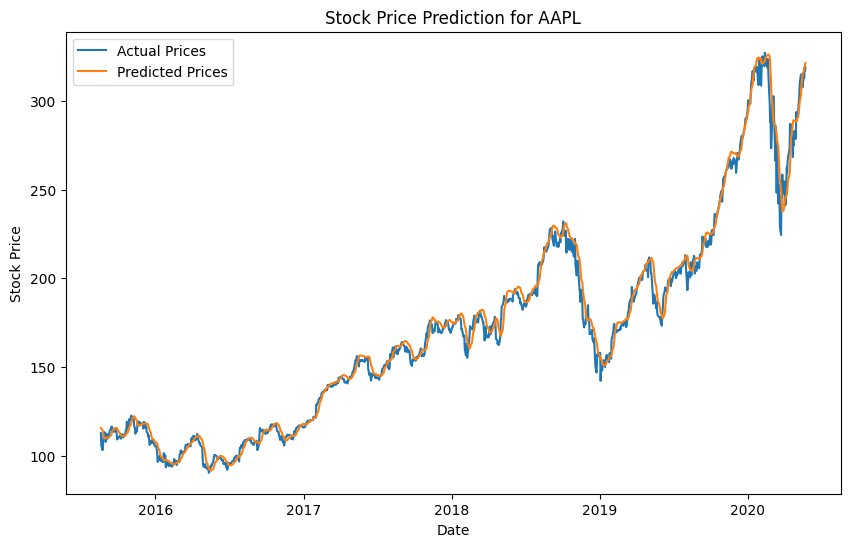

In [3]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os

# Path to your cleaned ZIP file
zip_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL.zip"
extract_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find the extracted CSV file
files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
if not files:
    raise FileNotFoundError("No CSV file found in the ZIP archive.")

csv_file_path = os.path.join(extract_path, files[0])

# Load the dataset
df = pd.read_csv(csv_file_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Feature selection
data = df[['close']]  # Assuming 'close' is the target variable

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM model
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 60  # Sequence length for time series data
x, y = create_sequences(scaled_data, seq_length)

# Reshape data for LSTM
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build LSTM Model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, batch_size=32, epochs=10)

# Predict future stock prices
predicted_prices = model.predict(x)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index[seq_length:], data[seq_length:], label='Actual Prices')
plt.plot(df.index[seq_length:], predicted_prices, label='Predicted Prices')
plt.title('Stock Price Prediction for AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [5]:
pip install streamlit


   ---------------------------------------- 9.7/9.7 MB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 731.2/731.2 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 25.5/25.5 MB 10.0 MB/s eta 0:00:00
   ---------------------------------------- 6.9/6.9 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install prophet


   ---------------------------------------- 13.3/13.3 MB 7.0 MB/s eta 0:00:00
   --------------------------------------- 824.7/824.7 kB 12.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install fbprophet


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [1 lines of output]
  ERROR: Can not execute `setup.py` since setuptools is not available in the build environment.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


C:\Users\Achuth Kaja\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0415
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0011
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 9.6245e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0011
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 8.4935e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 8.7141e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 9.1054e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 7.2318e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 6.5009e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 5.6496e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1

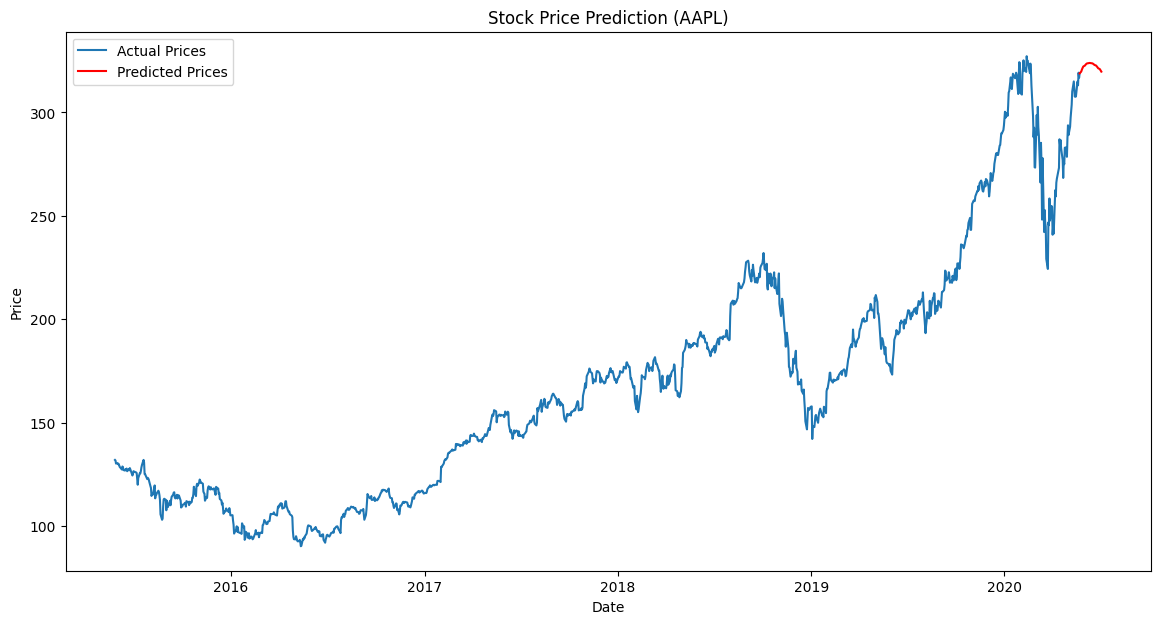

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import zipfile
import os

# Extract ZIP file
zip_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL.zip"
extract_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
csv_file_path = os.path.join(extract_path, files[0])

# Load data
df = pd.read_csv(csv_file_path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df[['close']]
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
seq_length = 60
x, y = [], []
for i in range(len(scaled_data) - seq_length):
    x.append(scaled_data[i:i+seq_length])
    y.append(scaled_data[i+seq_length])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, batch_size=32, epochs=10)

# Predict next 30 days using LSTM
future_input = scaled_data[-seq_length:]
future_input = np.reshape(future_input, (1, seq_length, 1))

predicted_prices = []
for _ in range(30):
    pred = model.predict(future_input)
    pred = np.reshape(pred, (1, 1, 1))
    predicted_prices.append(pred[0][0][0])
    future_input = np.append(future_input[:, 1:, :], pred, axis=1)

predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Actual Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='B'), predicted_prices, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/10


C:\Users\Achuth Kaja\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0352
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0015
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0012
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 8.5419e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 8.9434e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 9.0772e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 7.4469e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 8.5343e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 6.7509e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 7.0958e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━

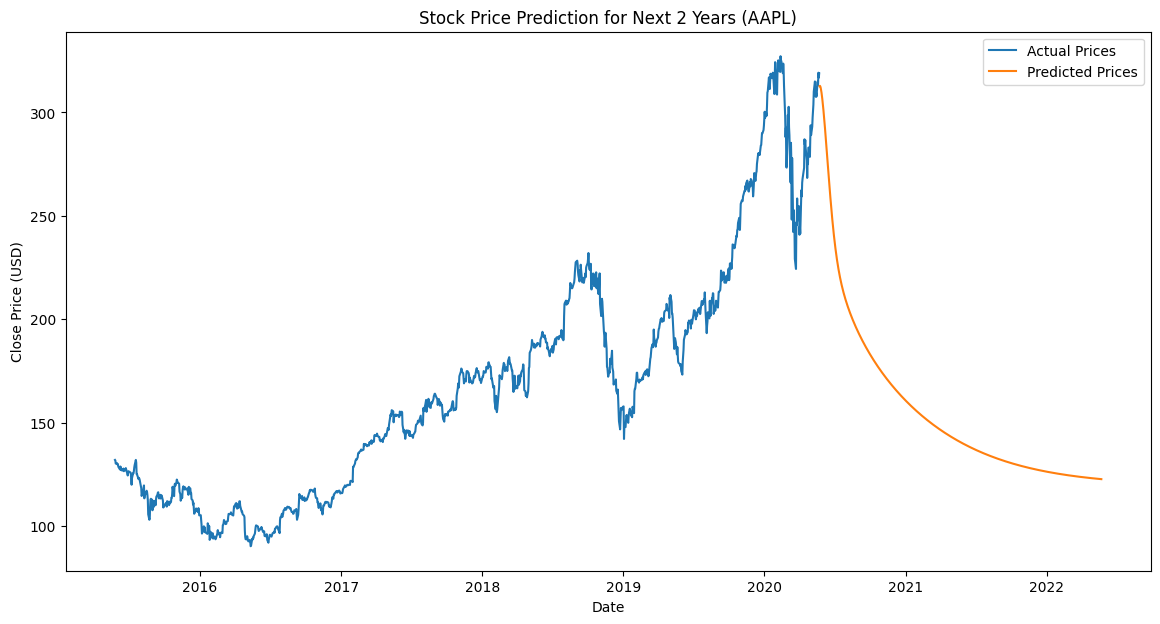

,Predicted
2020-05-23 00:00:00+00:00,312.744446
2020-05-24 00:00:00+00:00,312.875183
2020-05-25 00:00:00+00:00,312.537811
2020-05-26 00:00:00+00:00,311.839539
2020-05-27 00:00:00+00:00,310.853394
...,...
2022-05-18 00:00:00+00:00,122.835625
2022-05-19 00:00:00+00:00,122.817947
2022-05-20 00:00:00+00:00,122.800369
2022-05-21 00:00:00+00:00,122.782890


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import zipfile
import os

# Extract ZIP file
zip_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL.zip"
extract_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
csv_file_path = os.path.join(extract_path, files[0])

# Load data
df = pd.read_csv(csv_file_path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df[['close']]
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
seq_length = 60
x, y = [], []
for i in range(len(scaled_data) - seq_length):
    x.append(scaled_data[i:i+seq_length])
    y.append(scaled_data[i+seq_length])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, batch_size=32, epochs=10)

# Predict next 2 years using LSTM
future_input = scaled_data[-seq_length:]
future_input = np.reshape(future_input, (1, seq_length, 1))

predicted_prices = []
future_days = 730  # Approx 2 years
for _ in range(future_days):
    pred = model.predict(future_input)
    pred = np.reshape(pred, (1, 1, 1))
    predicted_prices.append(pred[0][0][0])
    future_input = np.append(future_input[:, 1:, :], pred, axis=1)

predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Create a date range for 2 years
last_date = df.index[-1]
date_range = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)
predicted_df = pd.DataFrame(predicted_prices, index=date_range, columns=['Predicted'])

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Actual Prices')
plt.plot(predicted_df['Predicted'], label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Stock Price Prediction for Next 2 Years (AAPL)')
plt.legend()
plt.show()

# Display future stock prices
display(predicted_df)


Epoch 1/10


C:\Users\Achuth Kaja\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0292
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0012
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0011
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0010
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 8.0340e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 8.5906e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 7.2384e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 7.2467e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 6.2274e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 6.6212e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━

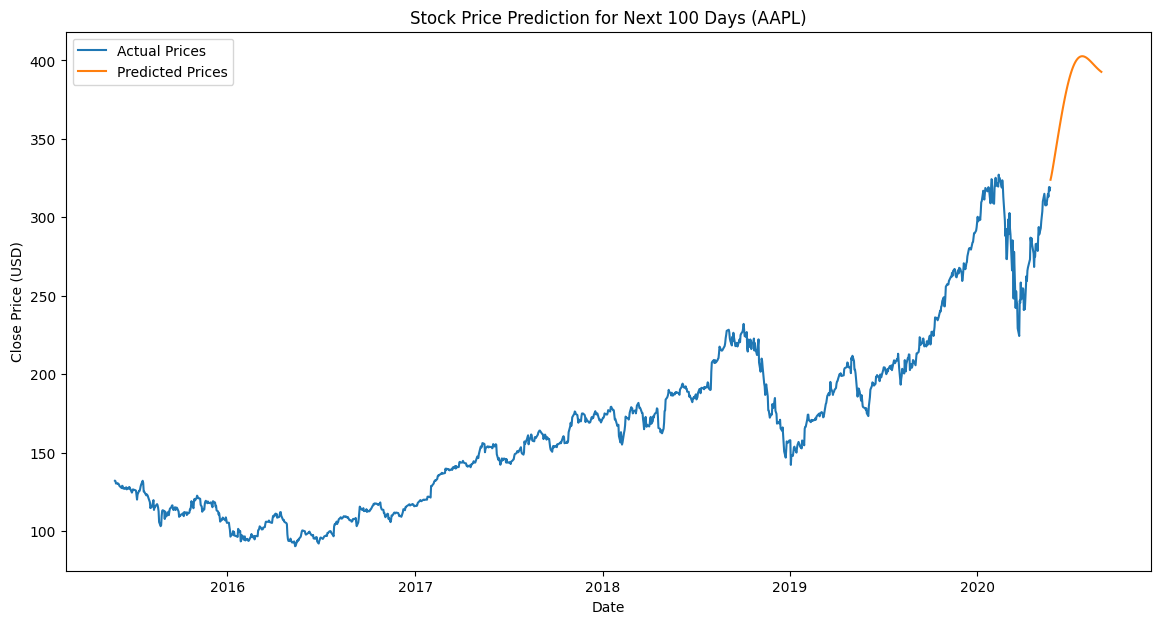

,Predicted
2020-05-23 00:00:00+00:00,323.958496
2020-05-24 00:00:00+00:00,325.381012
2020-05-25 00:00:00+00:00,327.024597
2020-05-26 00:00:00+00:00,328.806366
2020-05-27 00:00:00+00:00,330.675232
...,...
2020-08-26 00:00:00+00:00,393.816681
2020-08-27 00:00:00+00:00,393.534424
2020-08-28 00:00:00+00:00,393.261932
2020-08-29 00:00:00+00:00,392.999786


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import zipfile
import os

# Extract ZIP file
zip_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL.zip"
extract_path = r"C:\Users\Achuth Kaja\Downloads\archive\cleaned_AAPL"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
csv_file_path = os.path.join(extract_path, files[0])

# Load data
df = pd.read_csv(csv_file_path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df[['close']]
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
seq_length = 60
x, y = [], []
for i in range(len(scaled_data) - seq_length):
    x.append(scaled_data[i:i+seq_length])
    y.append(scaled_data[i+seq_length])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, batch_size=32, epochs=10)

# Predict next 100 days using LSTM
future_input = scaled_data[-seq_length:]
future_input = np.reshape(future_input, (1, seq_length, 1))

predicted_prices = []
future_days = 100  # Predict for 100 days
for _ in range(future_days):
    pred = model.predict(future_input)
    pred = np.reshape(pred, (1, 1, 1))
    predicted_prices.append(pred[0][0][0])
    future_input = np.append(future_input[:, 1:, :], pred, axis=1)

predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Create a date range for 100 days
last_date = df.index[-1]
date_range = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)
predicted_df = pd.DataFrame(predicted_prices, index=date_range, columns=['Predicted'])

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Actual Prices')
plt.plot(predicted_df['Predicted'], label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Stock Price Prediction for Next 100 Days (AAPL)')
plt.legend()
plt.show()

# Display future stock prices
display(predicted_df)


C:\Users\Achuth Kaja\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0428
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0014
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0012
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 9.2694e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 8.3545e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 7.9345e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 7.5448e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 9.8687e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 5.7179e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 7.5169e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Absolute Error (MAE): 8.974651912053426
Mean Squared Error (MSE): 117.89793864070214
Root Mean Squared Error (RMSE): 10.858081720115305


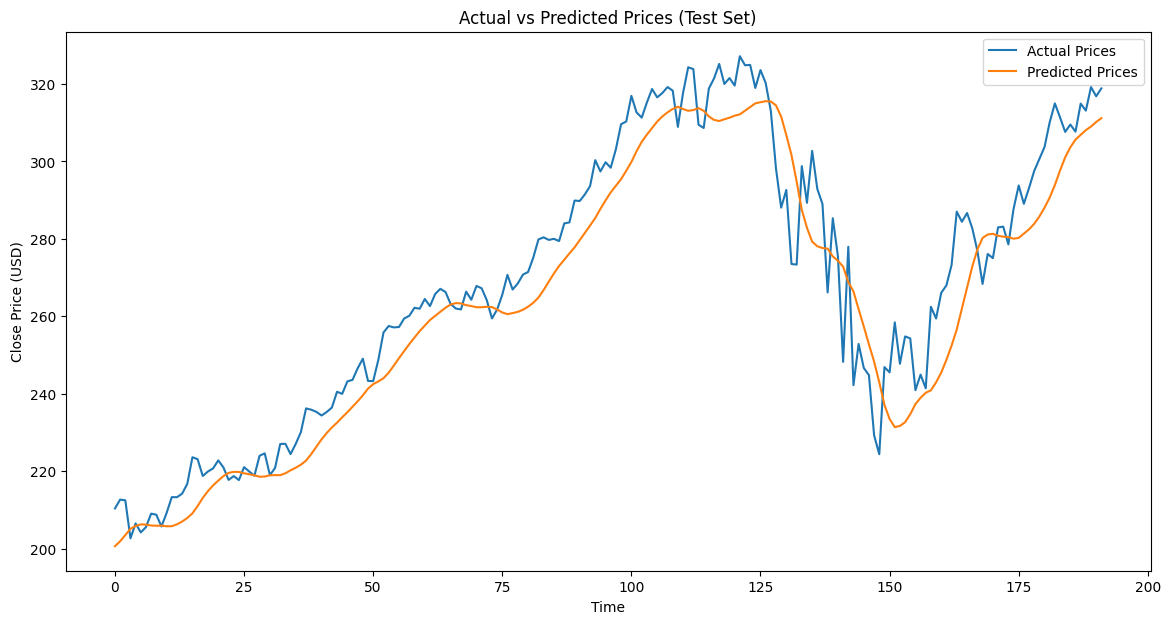

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data (assuming df is already loaded and preprocessed)
# df = pd.read_csv('your_data.csv')  # Uncomment and load your data if not already loaded
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df[['close']]
scaled_data = scaler.fit_transform(data)  # Ensure scaled_data is defined

# Prepare data for LSTM
seq_length = 60  # Ensure seq_length is defined
x, y = [], []
for i in range(len(scaled_data) - seq_length):
    x.append(scaled_data[i:i+seq_length])
    y.append(scaled_data[i+seq_length])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, batch_size=32, epochs=10)  # Train the model

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Prepare the test data for LSTM
x_test, y_test = [], []
for i in range(len(test_data) - seq_length):
    x_test.append(test_data[i:i+seq_length])
    y_test.append(test_data[i+seq_length])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict on the test data
predicted_test = model.predict(x_test)  # Now model is defined
predicted_test = scaler.inverse_transform(predicted_test)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the error metrics
mae = mean_absolute_error(y_test, predicted_test)
mse = mean_squared_error(y_test, predicted_test)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs predicted prices for the test set
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices')
plt.plot(predicted_test, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Close Price (USD)')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.legend()
plt.show()

In [20]:
import numpy as np

# Define the Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predicted_test)

# Calculate accuracy in percentage
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 3.31%
Accuracy: 96.69%
